In [4]:
%pylab inline
%matplotlib inline
import io
import h5py 
import pandas as pd
import scipy as sp
import numpy as np
from PIL import Image
from fractions import Fraction

from scipy import optimize 
from scipy.optimize import curve_fit,least_squares
from lmfit.models import GaussianModel
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colorbar import ColorbarBase, make_axes_gridspec


Populating the interactive namespace from numpy and matplotlib


    ##  

In [5]:
volume = 199.7
mass = volume/(2.54**3)
width = np.arange(1,1.8,0.1)
width[3]=1.25
length = double( mass/width**2)
for i in range(len(length)):
    print('{:>17.15f}'.format(length[i]),'\t','{:.2f}'.format(width[i]))

12.186441695718035 	 1.00
10.071439417948786 	 1.10
8.462806733137521 	 1.20
7.799322685259543 	 1.25
6.217572293733688 	 1.40
5.416196309208012 	 1.50
4.760328787389854 	 1.60
4.216761832428383 	 1.70


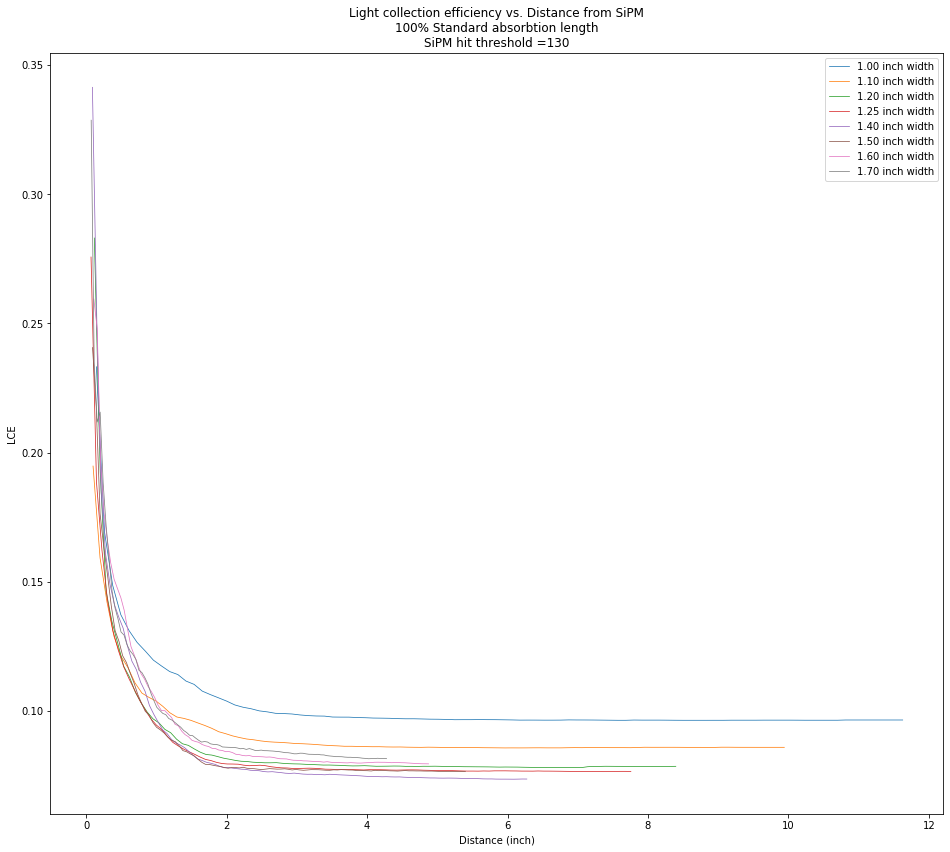

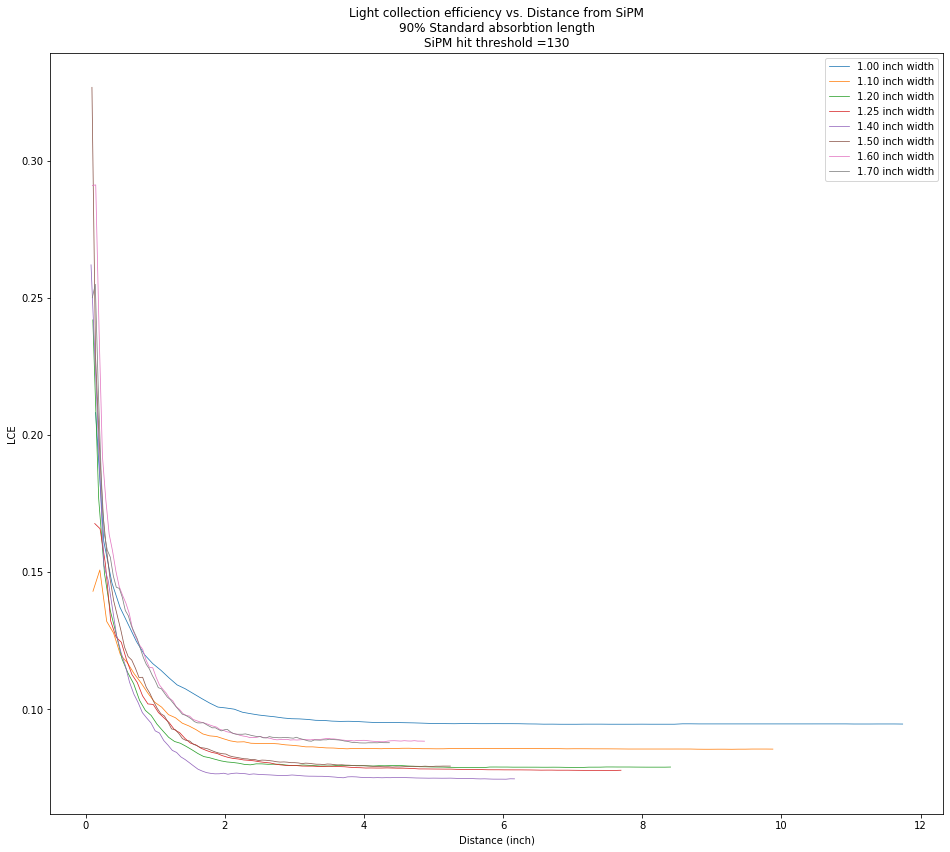

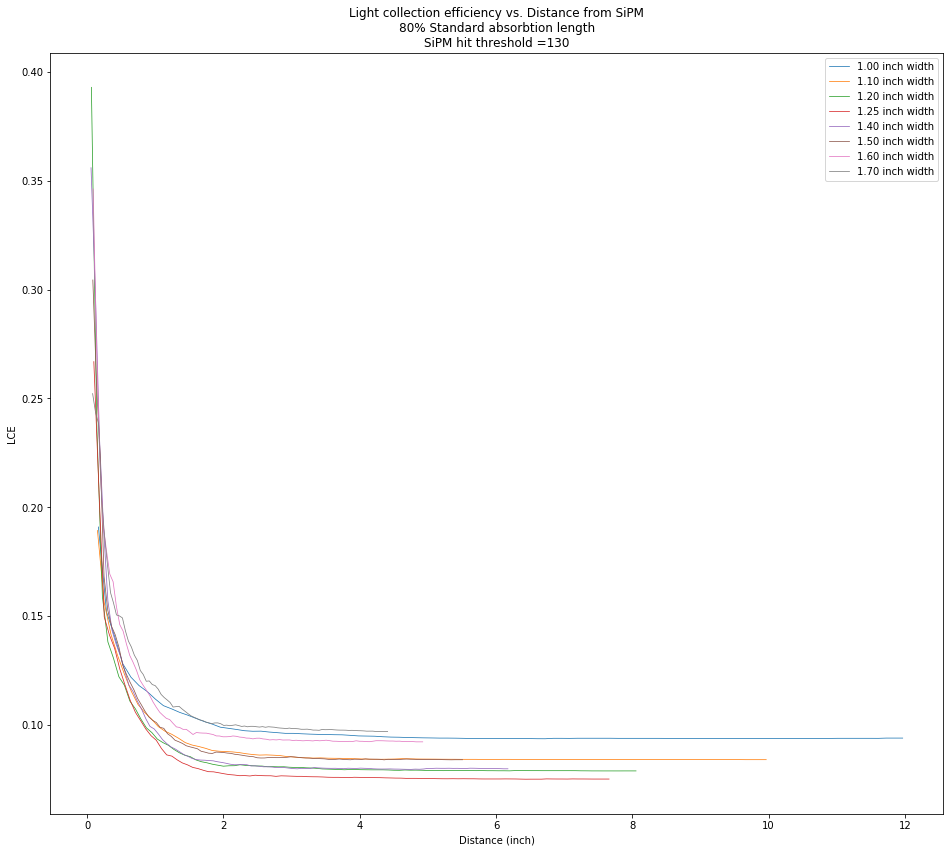

In [75]:
lengths = 8
ABL_n = 3
dfs = []
bins = 100 # for distances from SiPM

energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 130
LCE_threshold = 0
distance_threshold =  0 #inch

for i in range(ABL_n):
    fileName = [[] for i in range(lengths)]
    df = []
    nmp = []
    pos = []
    dist = []
    for j in range(lengths):
        prefix1 = 'constant_volume_200/build-constant_volume/LXe_200_gram_'
        i=i
        root = '_nt_'
        j=j
        csv ='.csv'
        fileName[j].append(f'{prefix1}{i}{root}{j}{csv}')
        df.append(pd.read_csv(fileName[j][0], sep=',',header=None, skiprows=range(0,10),
                    names=('Energy Deposited', 'SiPM Hits', 'Photons',
                            'x_pos','y_pos','z_pos')))
        df[j]['LCE']=df[j]['SiPM Hits']/df[j]['Photons']
        df[j]['log(LCE)']=log(df[j]['SiPM Hits']/df[j]['Photons'])
        nmp.append(df[j].to_numpy())
        pos.append(nmp[j][:,3:6])
        pos[j][:,2]=pos[j][:,2]-min(pos[j][:,2])
        pos[j]= pos[j]/25.4
        dist.append(sqrt(sum(pos[j]**2,axis=1)))
        df[j]['z_pos'] = pos[j][:,2].tolist()
        df[j]['y_pos'] = pos[j][:,1].tolist()
        df[j]['x_pos'] = pos[j][:,0].tolist()
        df[j]['Distance'] = dist[j].tolist()
    dfs.append(df)

mins = np.zeros((ABL_n,lengths))
maxs = np.zeros((ABL_n,lengths))
bes = np.zeros((ABL_n,lengths,bins+1))
bcs = np.zeros((ABL_n,lengths,bins))
averages = np.zeros((ABL_n,lengths,bins))

titles = ['Light collection efficiency vs. Distance from SiPM',
          '% Standard absorbtion length',
          'SiPM hit threshold =']
absorb= np.array([100,90,80])


for i in range(ABL_n):
    plt.figure(figsize=(16,14))
    plt.title('{}\n{}{}\n{}{}'.format(titles[0],absorb[i],titles[1],titles[2],SiPM_hit_threshold))
    plt.ylabel('LCE')
    plt.xlabel('Distance (inch)')
    for j in range(lengths): 
        dfs[i][j] = dfs[i][j][dfs[i][j]['Energy Deposited']>=energy_deposit_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Photons']>=photon_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['LCE']>=LCE_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['SiPM Hits']>=SiPM_hit_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Distance']>=distance_threshold] 
        mins[i,j]= np.min(dfs[i][j]['Distance'])
        maxs[i,j]= np.max(dfs[i][j]['Distance'])
        bes[i,j,:] = np.linspace(mins[i,j],maxs[i,j],bins+1)
        bcs[i,j,:] = bes[i,j,:-1] + np.diff(bes[i,j,:]) / 2.
        arraY = dfs[i][j]['Distance']
        for k in range(bins):
            msk = arraY>=bes[i,j,k]
            mask = arraY<bes[i,j,k+1]
            mk = msk = mask         
            averages[i,j,k] = dfs[i][j]['LCE'][mk].mean()
        plt.plot(bcs[i,j],averages[i,j],label='{:.2f} inch width'.format(width[j]),lw=0.75)
    plt.legend()
    plt.show()
    

In [70]:
bcs[i,j]

array([0.08884221, 0.13769399, 0.18654576, 0.23539754, 0.28424932,
       0.3331011 , 0.38195287, 0.43080465, 0.47965643, 0.52850821,
       0.57735998, 0.62621176, 0.67506354, 0.72391531, 0.77276709,
       0.82161887, 0.87047065, 0.91932242, 0.9681742 , 1.01702598,
       1.06587776, 1.11472953, 1.16358131, 1.21243309, 1.26128486,
       1.31013664, 1.35898842, 1.4078402 , 1.45669197, 1.50554375,
       1.55439553, 1.60324731, 1.65209908, 1.70095086, 1.74980264,
       1.79865441, 1.84750619, 1.89635797, 1.94520975, 1.99406152,
       2.0429133 , 2.09176508, 2.14061686, 2.18946863, 2.23832041,
       2.28717219, 2.33602396, 2.38487574, 2.43372752, 2.4825793 ,
       2.53143107, 2.58028285, 2.62913463, 2.67798641, 2.72683818,
       2.77568996, 2.82454174, 2.87339351, 2.92224529, 2.97109707,
       3.01994885, 3.06880062, 3.1176524 , 3.16650418, 3.21535596,
       3.26420773, 3.31305951, 3.36191129, 3.41076307, 3.45961484,
       3.50846662, 3.5573184 , 3.60617017, 3.65502195, 3.70387

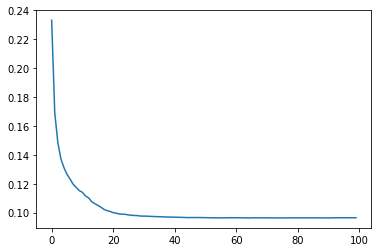

In [69]:

lengths = 8
ABL_n = 3
Angles = lengths
fileName = [[] for i in range((Angles))]
dfs = []
numpydf = []
position = []
distance = []
for j in range(ABL_n):
    
for i in range(Angles):
    prefix1 = 'constant_volume_200/build-constant_volume/LXe_200_gram_0_nt_'  
    i=i
    csv ='.csv'
    
    fileName[i].append(f'{prefix1}{i}{csv}')
    dfs.append(pd.read_csv(fileName[i][0], sep=',',header=None, skiprows=range(0,10),
                           names=('Energy Deposited', 'SiPM Hits', 'Photons',
                                 'x_pos','y_pos','z_pos')))  
    dfs[i]['LCE']=dfs[i]['SiPM Hits']/dfs[i]['Photons']
    dfs[i]['log(LCE)']=log(dfs[i]['SiPM Hits']/dfs[i]['Photons'])
    numpydf.append(dfs[i].to_numpy())
    position.append(numpydf[i][:,3:6])
    position[i][:,2]=position[i][:,2]-min(position[i][:,2])
    position[i]= position[i]/25.4
    distance.append(sqrt(sum(position[i]**2,axis=1)))
    dfs[i]['z_pos'] = position[i][:,2].tolist()
    dfs[i]['y_pos'] = position[i][:,1].tolist()
    dfs[i]['x_pos'] = position[i][:,0].tolist()
    dfs[i]['Distance'] = distance[i].tolist()
    
energy_deposit_threshold = 0.0
photon_threshold = 0
SiPM_hit_threshold = 130
LCE_threshold = 0
distance_threshold =  0 #inch
for i in range(len(dfs)): 
    dfs[i] = dfs[i][dfs[i]['Energy Deposited']>=energy_deposit_threshold]
    dfs[i] = dfs[i][dfs[i]['Photons']>=photon_threshold]
    dfs[i] = dfs[i][dfs[i]['LCE']>=LCE_threshold]
    dfs[i] = dfs[i][dfs[i]['SiPM Hits']>=SiPM_hit_threshold]
    dfs[i] = dfs[i][dfs[i]['Distance']>=distance_threshold]    
bins = 100
mins = np.zeros((Angles))
maxs = np.zeros((Angles))
bes = np.zeros((Angles,bins+1))
bcs = np.zeros((Angles,bins))
for i in range(Angles):
    mins[i]= np.min(distance[i])
    maxs[i]= np.max(distance[i])
    bes[i,:] = np.linspace(mins[i],maxs[i],bins+1)
    bcs[i,:] = bes[i,:-1] + np.diff(bes[i,:]) / 2.

average = np.zeros((Angles,bins))
for j in range(Angles):
    arraY = dfs[j]['Distance']
    for i in range(bins):
        msk = arraY>=bes[j,i] 
        mask = arraY<bes[j,i+1]
        mk = msk = mask
        average[j,i] = dfs[j]['LCE'][mk].mean()
plt.figure(figsize=(16,14))
plt.title('Light collection efficiency vs. Distance from SiPM\n 100% Standard absorbtion length\nSiPM hit threshold = {}'.format(SiPM_hit_threshold))
plt.xlabel('Distance (inch)')
plt.ylabel('LCE')
for i in range(Angles):    
    plot(bcs[i],average[i],label='{:.2f} inch width'.format(width[i]),lw=0.5)
legend()   

show()    

IndentationError: expected an indented block (<ipython-input-69-19a90d8f0580>, line 11)